**Regresja**

Zadanie 1

In [ ]:
#1
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/PJATK/keras/abalone.csv")

print(df.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
#2
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000

In [ ]:
#3

print("Liczba nulli")
print(df.isnull().sum())

print("Liczba pustych:")
print((df == '').sum())

Liczba nulli
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Liczba pustych:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [ ]:
#4
print(df['Sex'].value_counts())

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


Zadanie 2

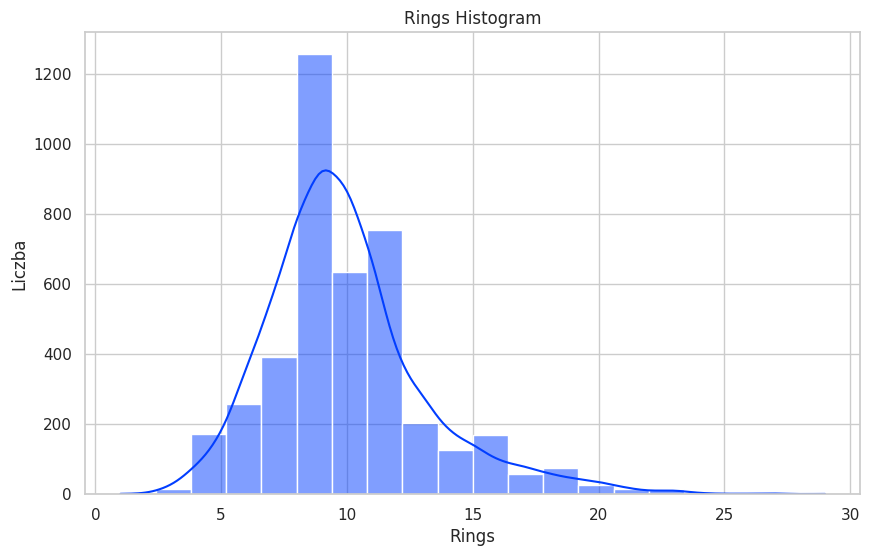

In [ ]:
#1
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Histogram zmiennej "Rings"
plt.figure()
sns.set(style="whitegrid", palette="bright")
plt.rcParams['figure.figsize'] = (10, 6)
sns.histplot(df['Rings'], kde=True, bins=20)
plt.title('Rings Histogram')
plt.xlabel('Rings')
plt.ylabel('Liczba')
plt.show()

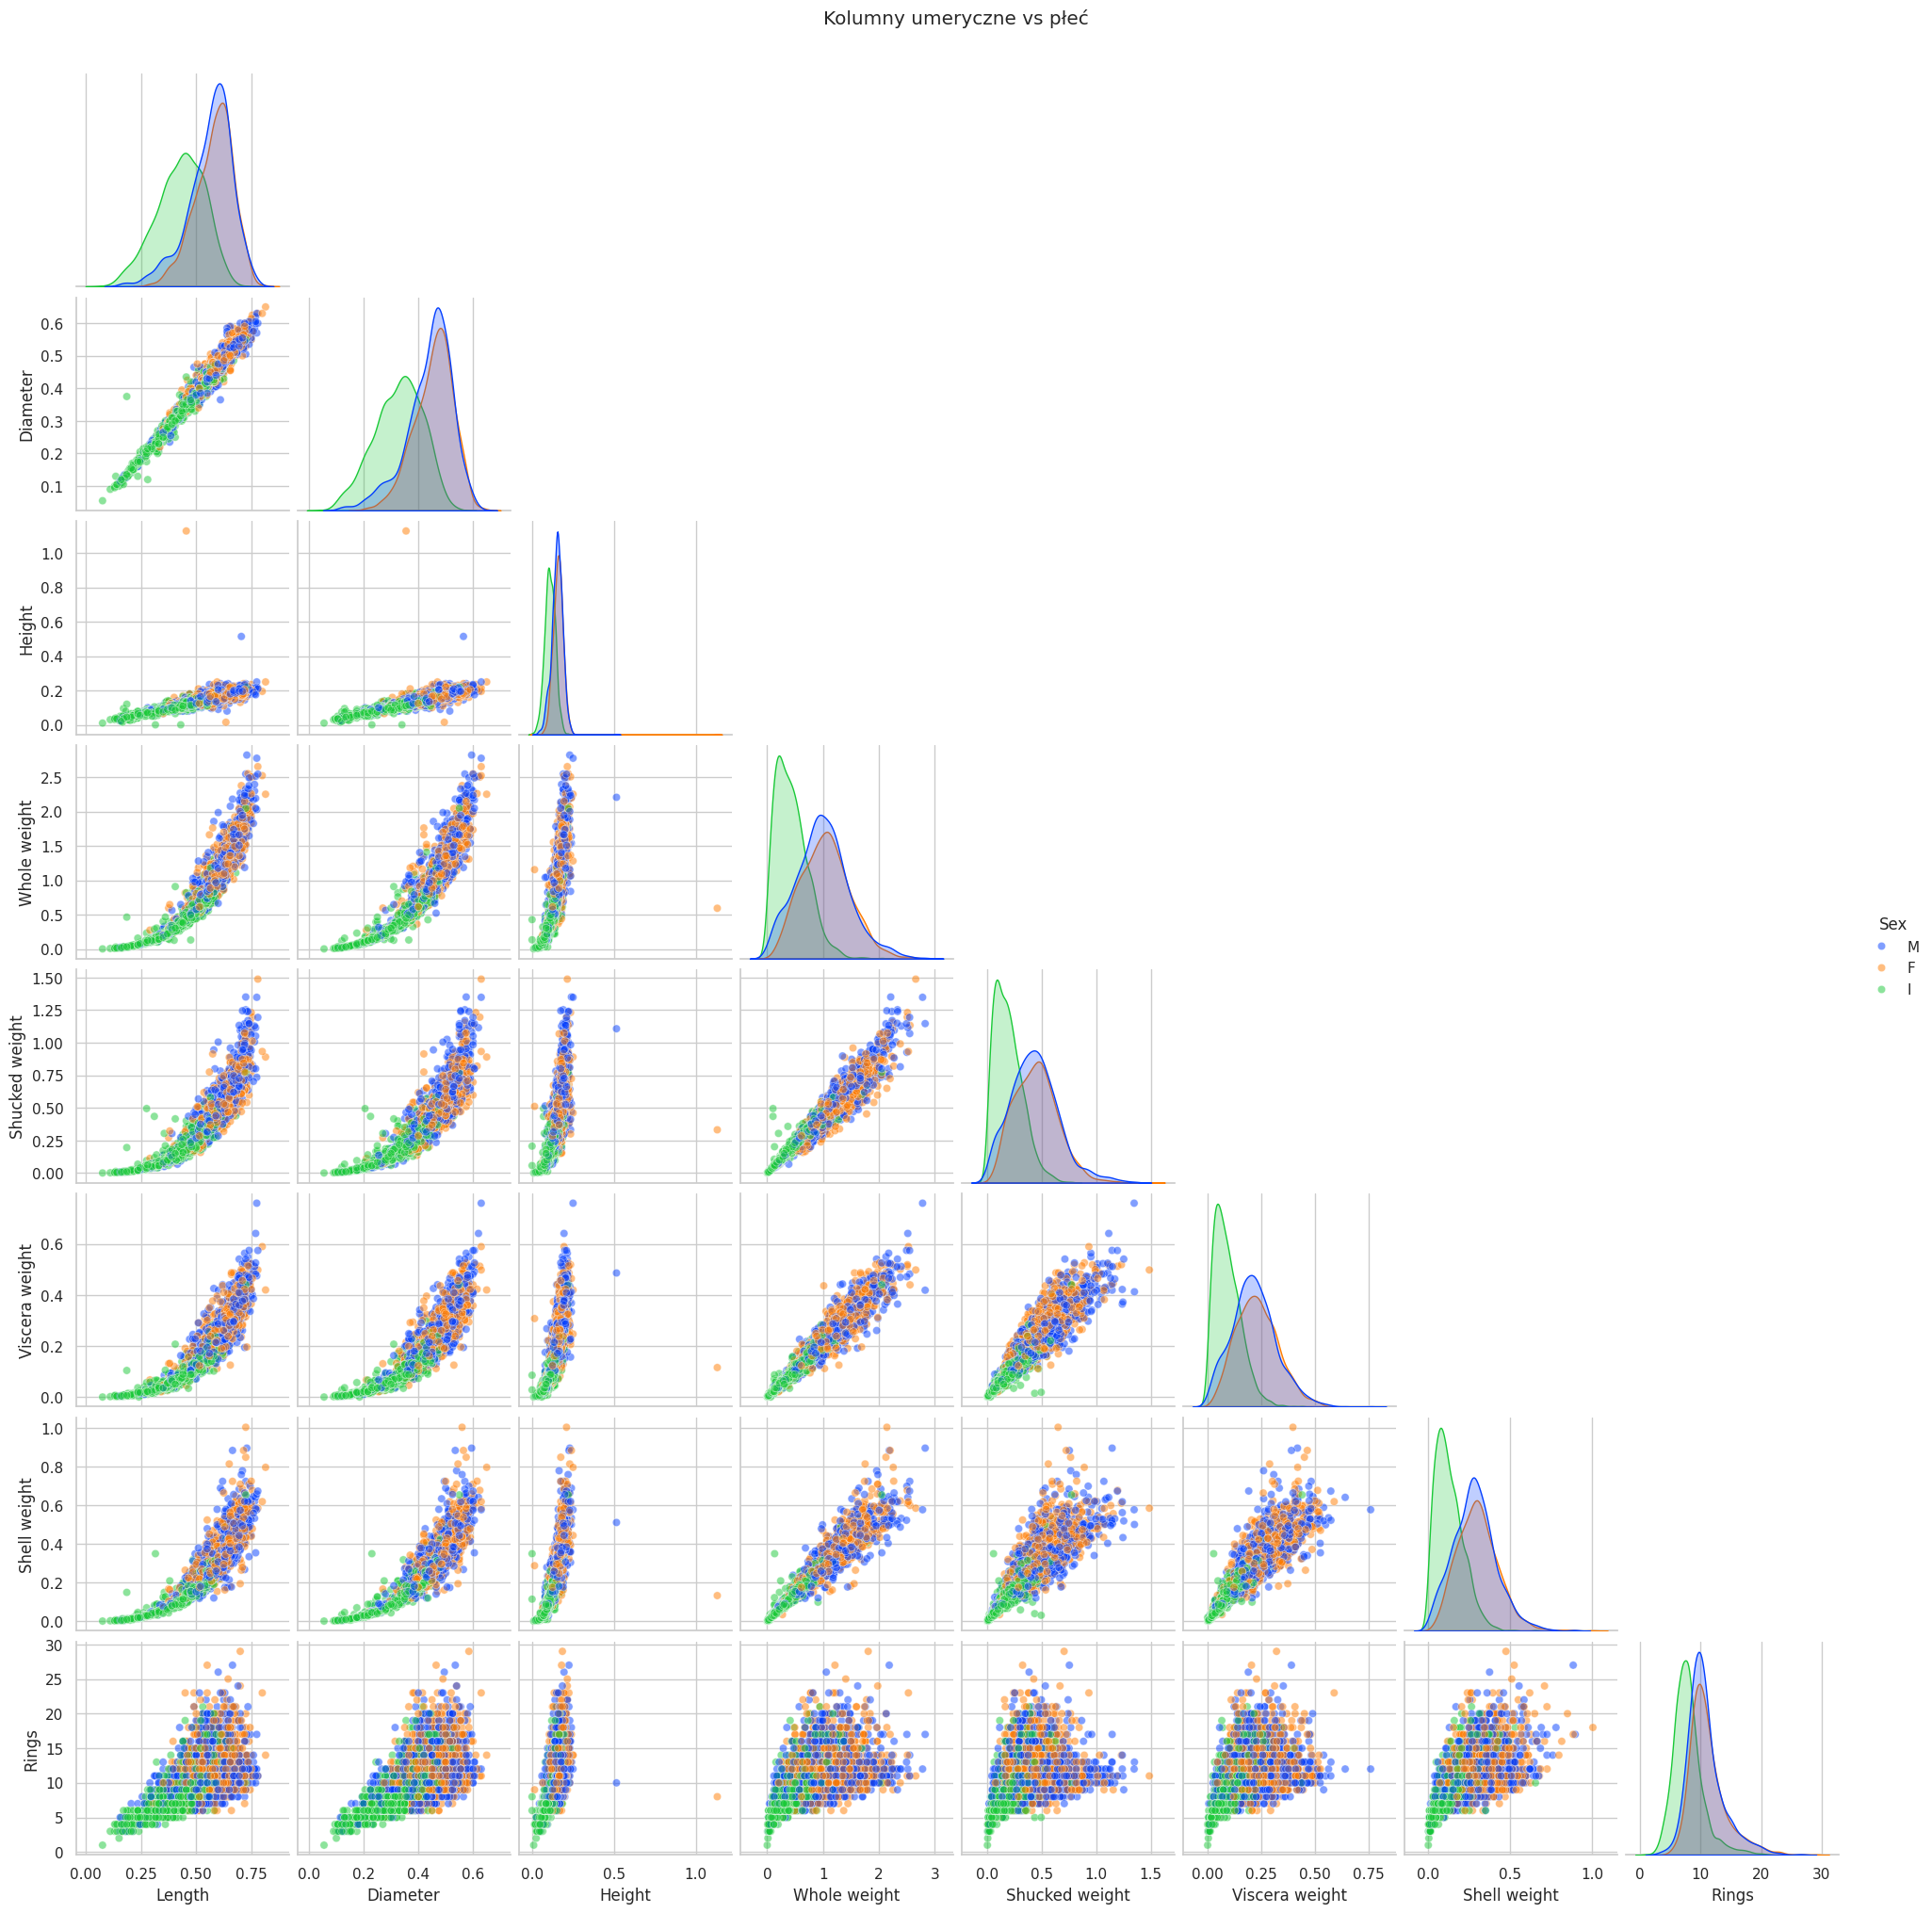

In [ ]:
#2
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df, vars=numeric_cols, hue="Sex", corner=True, diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle('Kolumny umeryczne vs płeć', y=1.02)
plt.show()

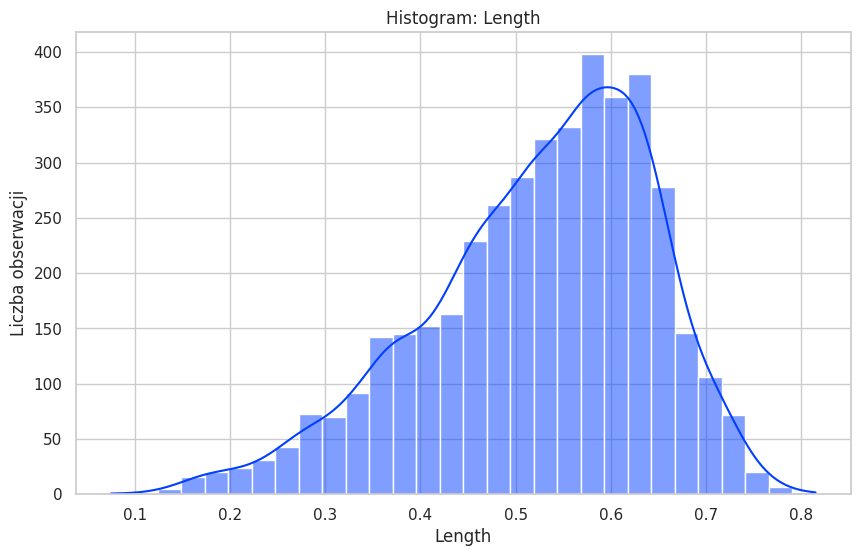

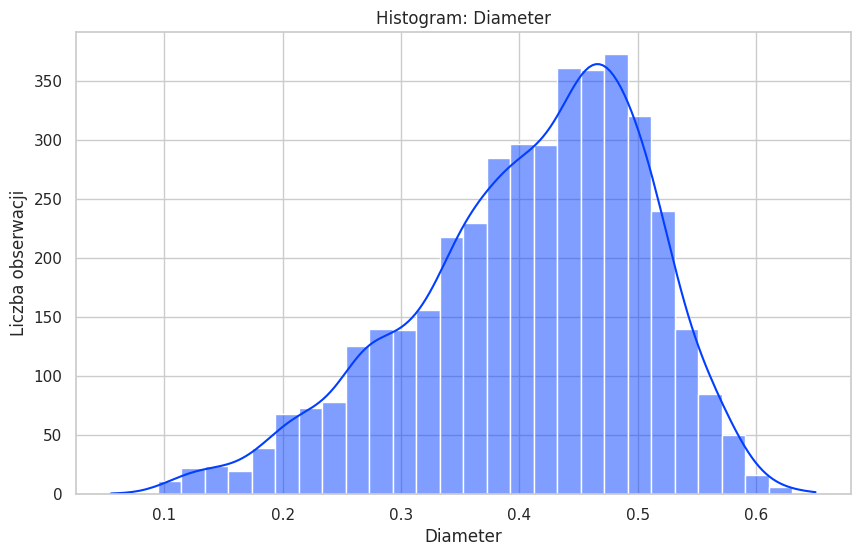

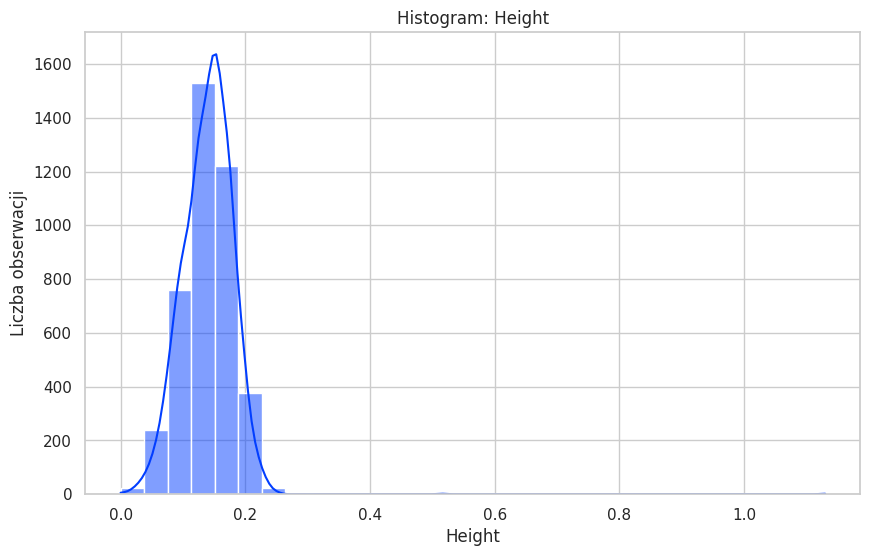

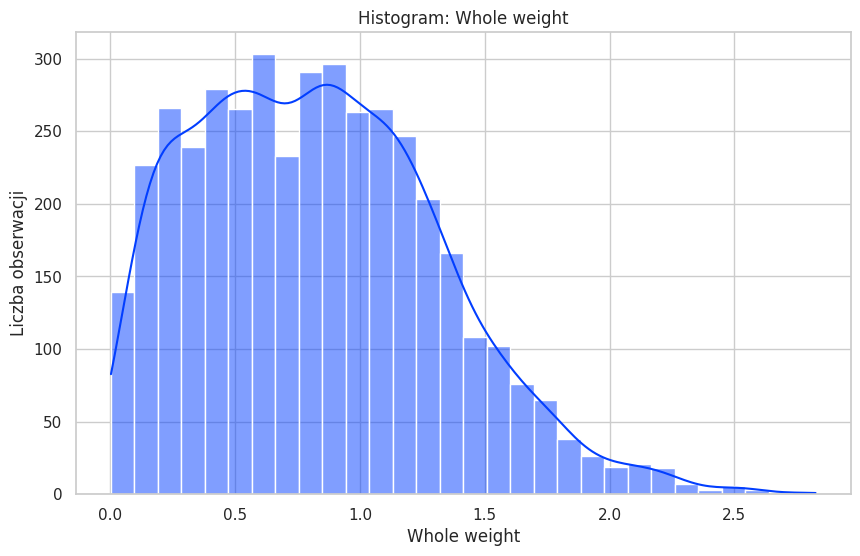

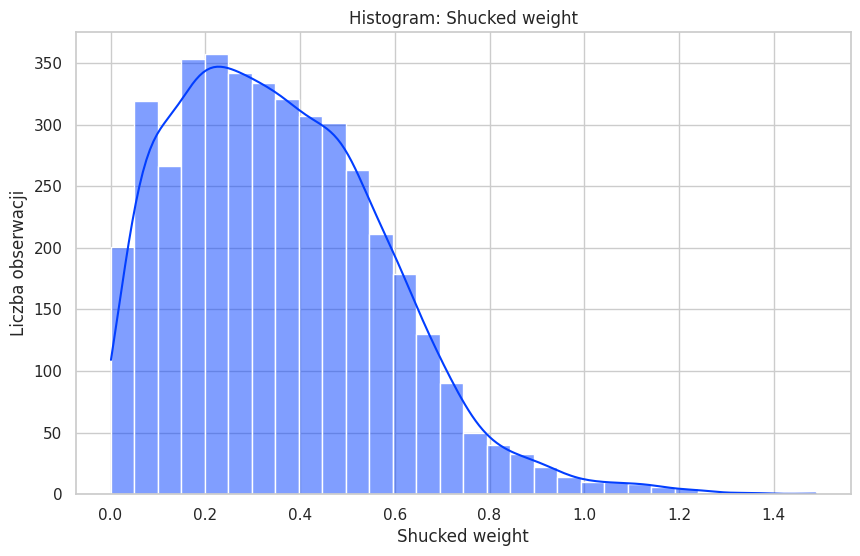

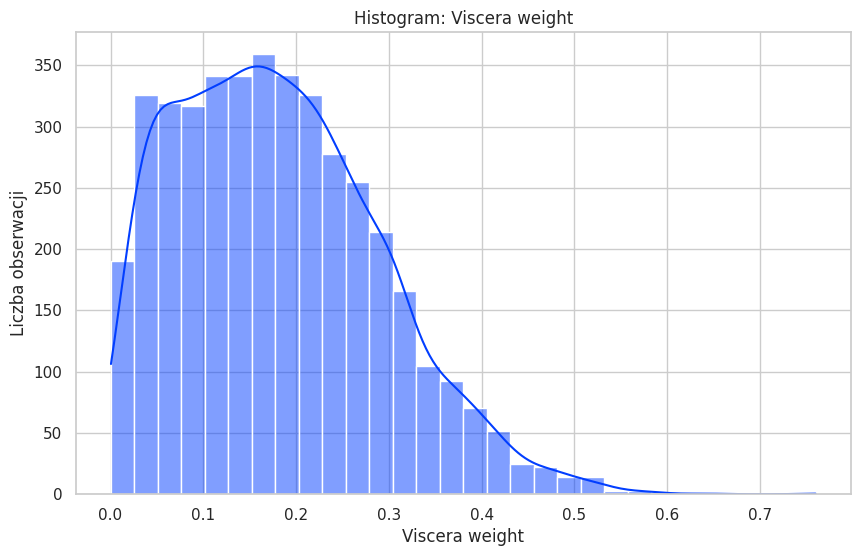

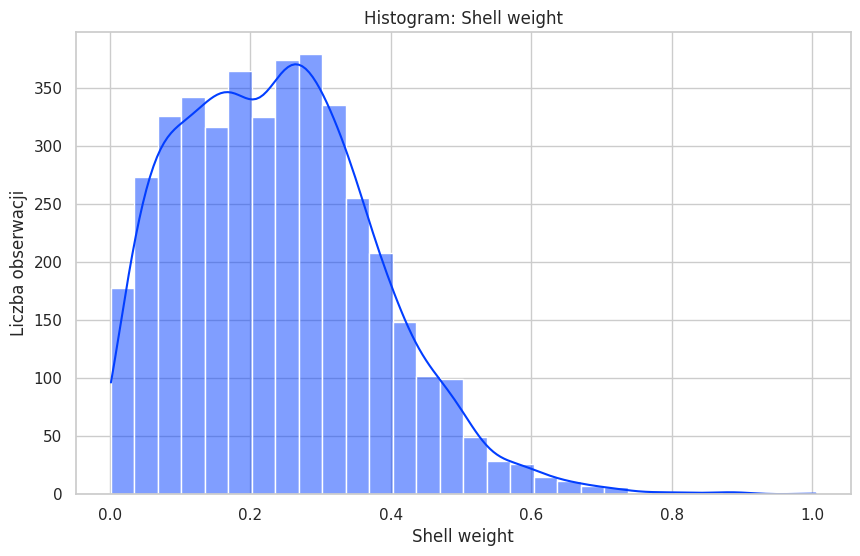

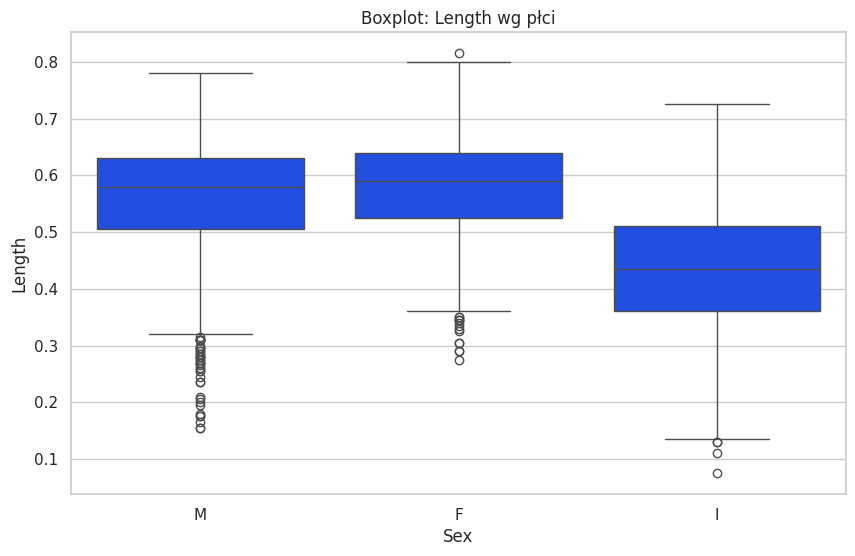

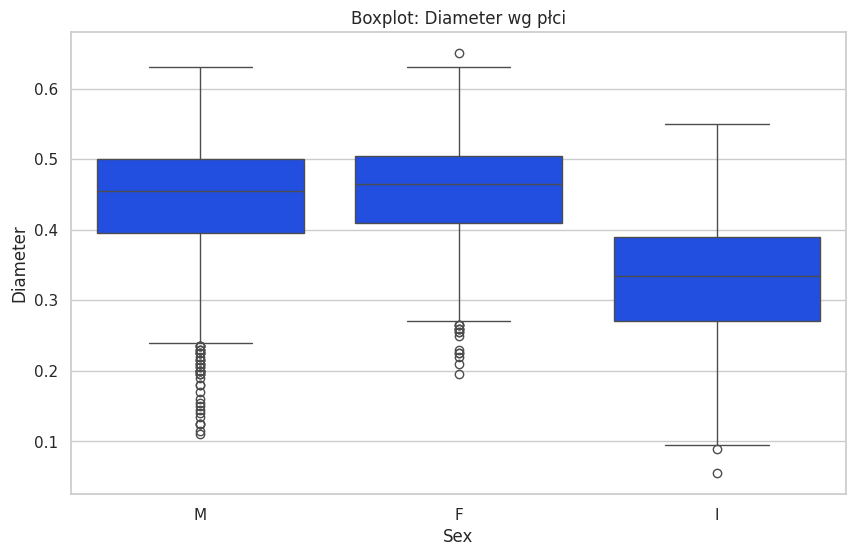

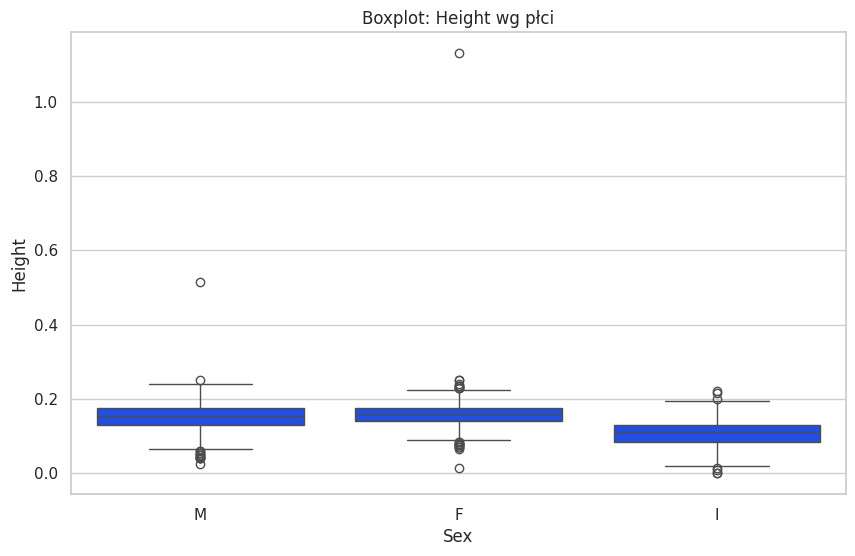

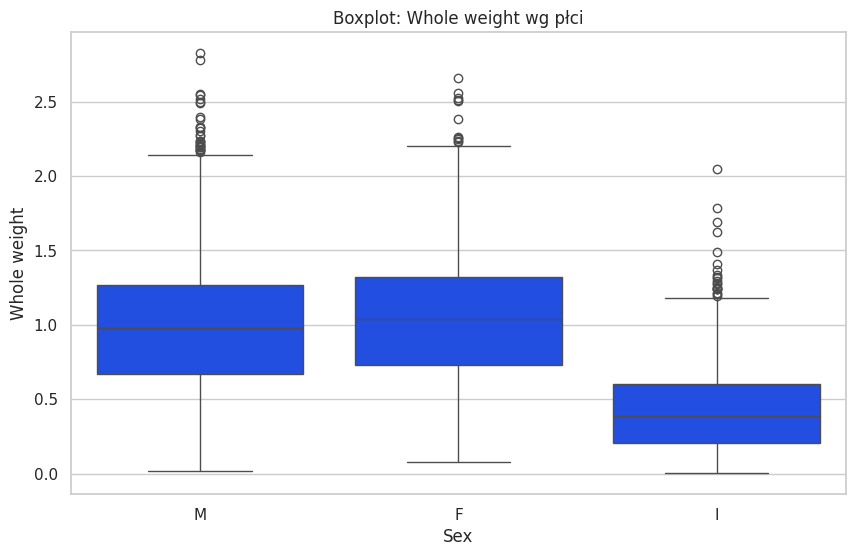

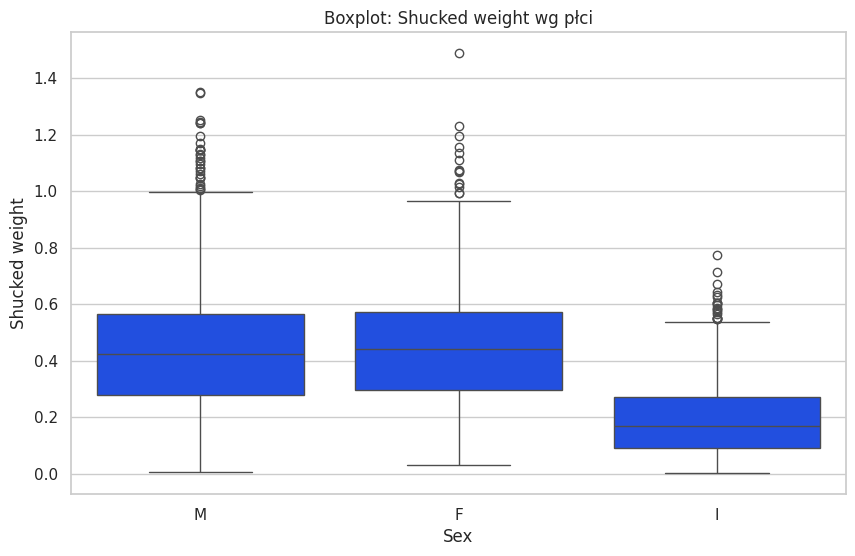

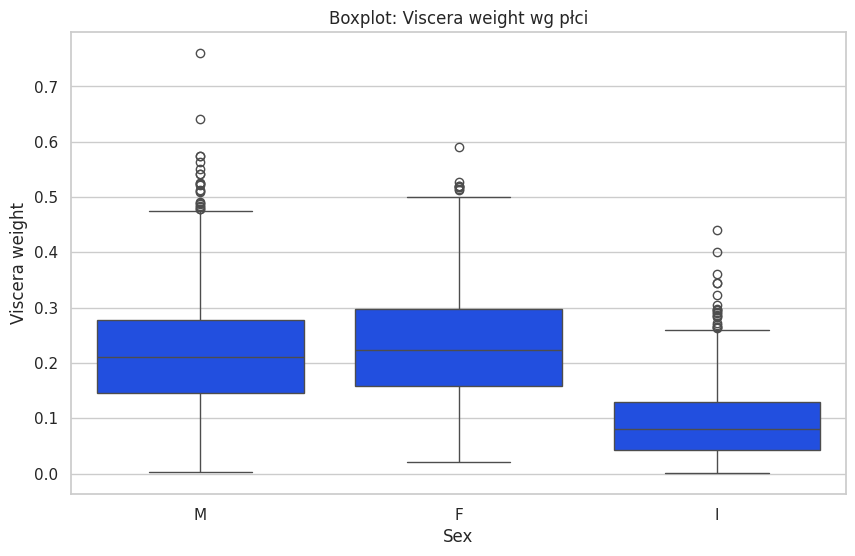

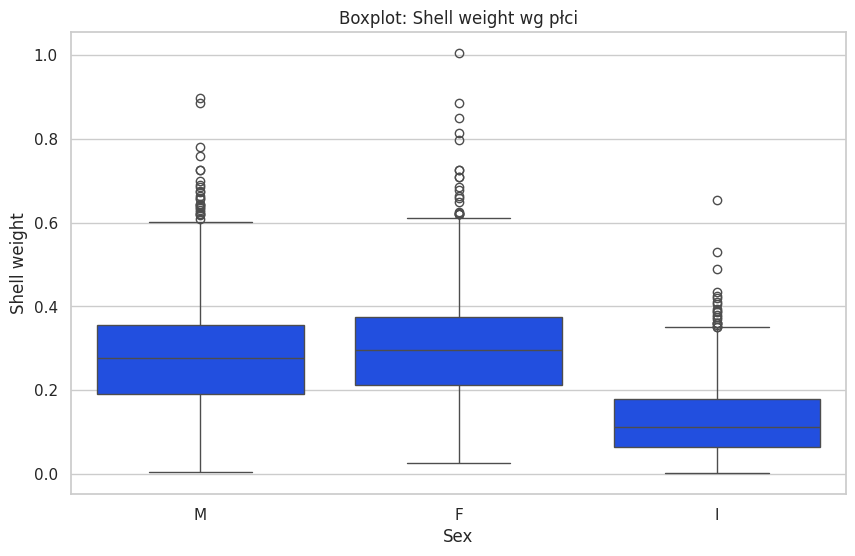

In [ ]:
#3
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Histogramy
for col in features:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.show()

# Boxploty, względem płci żeby dodać wymiar dla lepszej prezentacji danych (boxplot nie jest płaski)
for col in features:
    plt.figure()
    sns.boxplot(data=df, x='Sex', y=col)
    plt.title(f'Boxplot: {col} wg płci')
    plt.show()

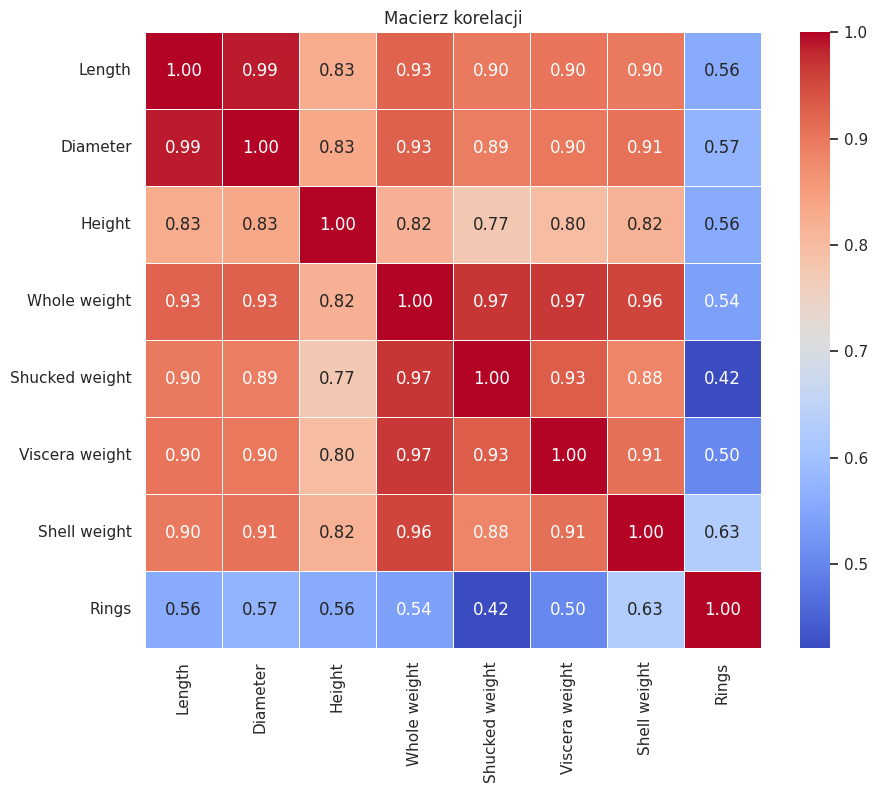

In [ ]:
#4
correlation_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

Zadanie 3

In [ ]:
#1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Rings', axis=1)
y = df['Rings']

In [ ]:
#2
X = pd.get_dummies(X, columns=['Sex'], dtype=float)

In [ ]:
#3
sex_col = df['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=sex_col)

In [ ]:
#4
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("\nX_train:\n", X_train.describe())
print("\ny_train:\n", y_train.describe())

X_train: (3341, 10)
X_test: (836, 10)
y_train: (3341,)
y_test: (836,)

X_train:
             Length     Diameter       Height  Whole weight  Shucked weight  \
count  3341.000000  3341.000000  3341.000000   3341.000000     3341.000000   
mean      0.524054     0.407984     0.139594      0.828287        0.358867   
std       0.119819     0.098967     0.042060      0.488599        0.220658   
min       0.130000     0.095000     0.000000      0.010500        0.004500   
25%       0.450000     0.350000     0.115000      0.444000        0.187000   
50%       0.545000     0.425000     0.140000      0.800000        0.334500   
75%       0.615000     0.480000     0.165000      1.154500        0.501000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Sex_F        Sex_I        Sex_M  
count     3341.000000   3341.000000  3341.000000  3341.000000  3341.000000  
mean         0.180234      0.238981     0.313080     0.321161 

In [ ]:
#5
sex_columns = ['Sex_F', 'Sex_I', 'Sex_M']
numeric_features = X_train.drop(columns=sex_columns).columns

mean = X_train[numeric_features].mean()
std = X_train[numeric_features].std()

lower_bounds = mean - 3 * std
upper_bounds = mean + 3 * std

inlier_mask_train = ((X_train[numeric_features] >= lower_bounds) & (X_train[numeric_features] <= upper_bounds)).all(axis=1)

X_train = X_train[inlier_mask_train]
y_train = y_train[inlier_mask_train]

print(X_train.shape)


(3268, 10)


In [ ]:
#6
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler_X.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler_X.transform(X_test[numeric_features])

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

print("\nX_train_scaled info:")
print(X_train_scaled.describe())


X_train_scaled info:
             Length      Diameter        Height  Whole weight  Shucked weight  \
count  3.268000e+03  3.268000e+03  3.268000e+03  3.268000e+03    3.268000e+03   
mean   2.609092e-16 -1.119735e-16 -6.250950e-16 -1.674167e-16   -1.674167e-16   
std    1.000153e+00  1.000153e+00  1.000153e+00  1.000153e+00    1.000153e+00   
min   -3.095262e+00 -3.049561e+00 -3.348412e+00 -1.742832e+00   -1.681655e+00   
25%   -6.264214e-01 -5.915664e-01 -6.419219e-01 -8.029834e-01   -7.984626e-01   
50%    1.532124e-01  1.406022e-01  3.470072e-02 -3.865356e-02   -9.581205e-02   
75%    7.595942e-01  7.681753e-01  7.113234e-01  7.199171e-01    7.001593e-01   
max    2.058984e+00  2.075619e+00  3.011840e+00  3.109168e+00    3.253977e+00   

       Viscera weight  Shell weight        Sex_F        Sex_I        Sex_M  
count    3.268000e+03  3.268000e+03  3268.000000  3268.000000  3268.000000  
mean    -6.522730e-17 -1.288239e-16     0.313341     0.324051     0.362607  
std      1.000153

Zadanie 4

In [ ]:
#1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


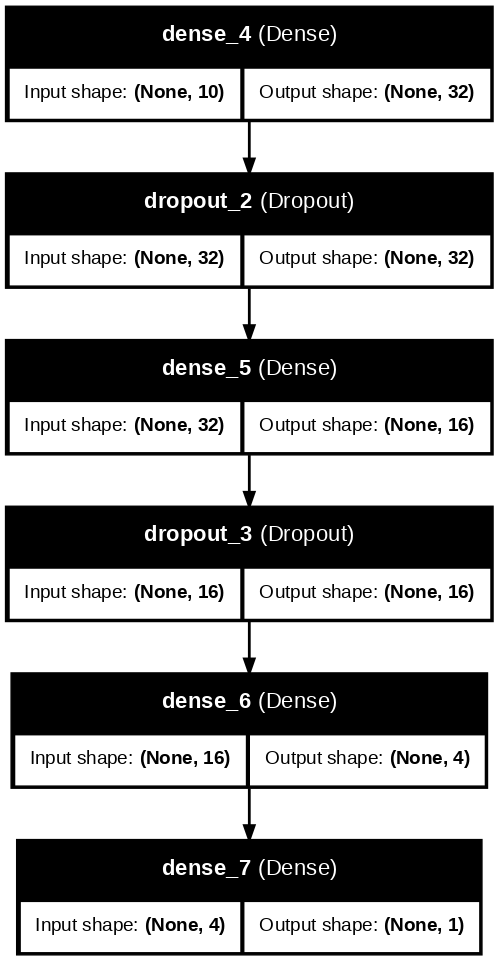

In [ ]:
#2
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=100)

In [ ]:
#3
import tensorflow.keras.backend as K
def r2_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

model.compile(
    optimizer=RMSprop(),
    loss=MeanSquaredError(),
    metrics=[r2_metric, RootMeanSquaredError()]
)

In [ ]:
#4
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8303 - r2_metric: 0.1204 - root_mean_squared_error: 0.9106 - val_loss: 0.6339 - val_r2_metric: 0.4154 - val_root_mean_squared_error: 0.7962
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6357 - r2_metric: 0.3423 - root_mean_squared_error: 0.7971 - val_loss: 0.6014 - val_r2_metric: 0.4416 - val_root_mean_squared_error: 0.7755
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6113 - r2_metric: 0.3718 - root_mean_squared_error: 0.7810 - val_loss: 0.5662 - val_r2_metric: 0.4669 - val_root_mean_squared_error: 0.7524
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5457 - r2_metric: 0.4243 - root_mean_squared_error: 0.7380 - val_loss: 0.5561 - val_r2_metric: 0.4706 - val_root_mean_squared_error: 0.7457
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5127 - r2_metric: 0.4565 - root_mean_squared_error: 0.7156 - val_loss: 0.5151 - val_r2_metric: 0.4982 - val_root_mean_squared

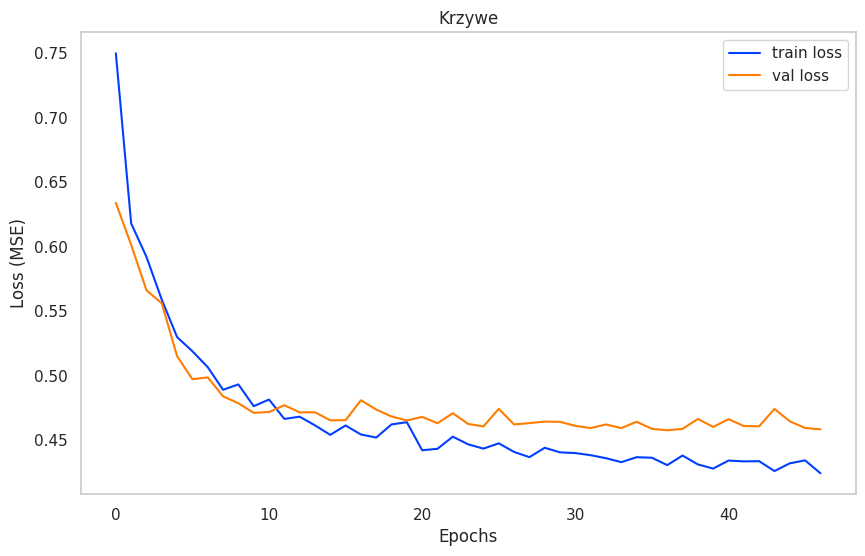

In [ ]:
#5
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Krzywe')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#6
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_train_true = scaler_y.inverse_transform(y_train_scaled)
y_test_true = scaler_y.inverse_transform(y_test_scaled)

y_train_pred_rounded = np.round(y_train_pred)
y_test_pred_rounded = np.round(y_test_pred)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


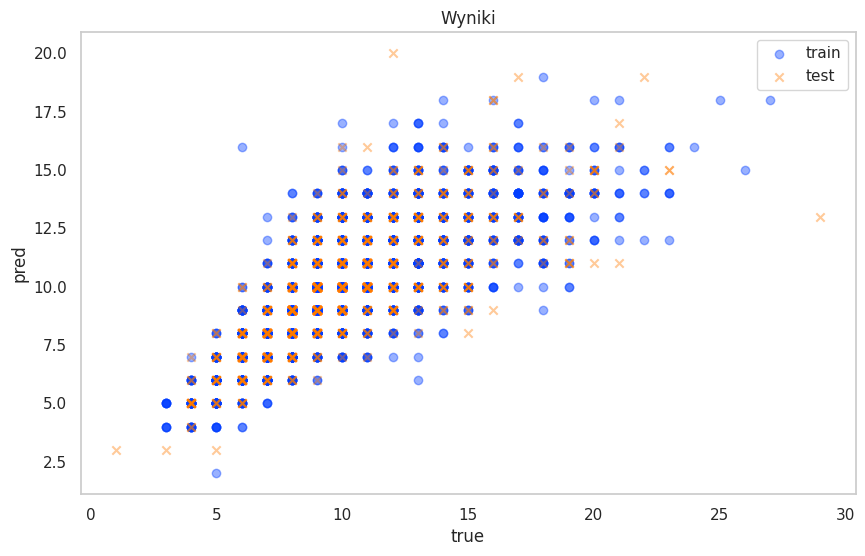

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_true, y_train_pred_rounded, alpha=0.4, label='train')
plt.scatter(y_test_true, y_test_pred_rounded, alpha=0.4, label='test', marker='x')
plt.xlabel('true')
plt.ylabel('pred')
plt.title('Wyniki')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print("Train MSE:", mean_squared_error(y_train_true, y_train_pred))
print("Train R2 :", r2_score(y_train_true, y_train_pred))

print("Test MSE :", mean_squared_error(y_test_true, y_test_pred))
print("Test R2  :", r2_score(y_test_true, y_test_pred))

Train MSE: 4.056501760868139
Train R2 : 0.5917423255681852
Test MSE : 4.548208400087756
Test R2  : 0.5744533336098624


Wnioski: Różnice między modeliami są niewielkie co potwierdza krzywa uczenia która maleje. Wyniki R2 oraz MSE jednak są bardzo przeciętne. Co nie zmienia faktu, że model działa poprawnie. Wymagałby większego tuningu.

Zadanie 5

In [ ]:
!pip install keras-tuner --quiet

In [ ]:
#1
import keras_tuner as kt
from tensorflow.keras import layers

def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16),
                           activation=hp.Choice('act_1', ['relu', 'tanh']),
                           input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dropout(hp.Choice('dropout_1', [0.1, 0.2, 0.3])))
    model.add(layers.Dense(units=hp.Int('units_2', 4, 64, step=8),
                           activation=hp.Choice('act_2', ['relu', 'tanh'])))
    model.add(layers.Dense(1))  # regresja

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='mse',
                  metrics=[r2_metric])
    return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='tuner_dir',
                        project_name='abalone_model')

tuner.search(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 38s]
val_loss: 4.474339008331299

Best val_loss So Far: 4.437464714050293
Total elapsed time: 00h 10m 13s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
